In [91]:
import numpy   as np
import pandas  as pd
import seaborn as sns

from matplotlib              import pyplot as plt
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing   import StandardScaler

In [2]:
raw_data = pd.read_csv('features.csv').drop(['barracks_status_dire',
                                             'barracks_status_radiant',
                                             'duration',
                                             'tower_status_dire',
                                             'tower_status_radiant'], axis=1)
raw_data.head()

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,radiant_win
0,0,1430198770,7,11,5,2098,1489,20,0,0,...,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0,1
1,1,1430220345,0,42,4,1188,1033,9,0,1,...,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0,1
2,2,1430227081,7,33,4,1319,1270,22,0,0,...,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0,0
3,3,1430263531,1,29,4,1779,1056,14,0,0,...,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,0
4,4,1430282290,7,13,4,1431,1090,8,1,0,...,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0,0


# GradientBoostingClassifier

## Feature engineering

In [4]:
#data.count()[data.count() < len(data)]
raw_data.count().where(lambda x: x < len(raw_data)).dropna().astype(int)

first_blood_time               77677
first_blood_team               77677
first_blood_player1            77677
first_blood_player2            53243
radiant_bottle_time            81539
radiant_courier_time           96538
radiant_flying_courier_time    69751
radiant_first_ward_time        95394
dire_bottle_time               81087
dire_courier_time              96554
dire_flying_courier_time       71132
dire_first_ward_time           95404
dtype: int32

In [5]:
data = raw_data.fillna(raw_data.mean())
len(data)

97230

In [6]:
X = data.drop(['radiant_win'], axis=1)
y = data['radiant_win']
    
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled)
# X_train, X_holdout, y_train, y_holdout = train_test_split(X_scaled, y, test_size=0.3)


X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3)

## Hyperparameter tuning

In [7]:
gbc = GradientBoostingClassifier()

gbc_grid = GridSearchCV(estimator=gbc, param_grid={'n_estimators': range(10, 51, 10)}, cv=5)
gbc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(10, 51, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

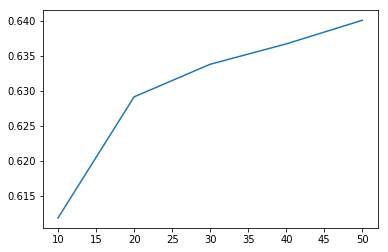

In [88]:
gbc_grid_scores = pd.DataFrame(gbc_grid.grid_scores_)
gbc_grid_scores['n_estimators'] = gbc_grid_scores['parameters'].map(lambda x: x['n_estimators'])

plt.plot(gbc_grid_scores['n_estimators'], gbc_grid_scores['mean_validation_score']);

In [ ]:
cv_scores, holdout_scores = [], []
n_estimators = range(50, 101, 10)

for k in n_estimators:
    gbc_clf = GradientBoostingClassifier(n_estimators=k)
    cv_scores.append(np.mean(cross_val_score(gbc_clf, X_train, y_train, cv=5)))
    gbc_clf.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, gbc_clf.predict(X_holdout)))

plt.plot(n_estimators, cv_scores, label='CV')
plt.plot(n_estimators, holdout_scores, label='holdout')
plt.title('GradientBoostingClassifier')
plt.legend();

## Train

In [216]:
#clf = GradientBoostingClassifier(n_estimators=30).fit(X_train, y_train)
clf = LogisticRegression().fit(X_train, y_train)

# LogisticRegression

## Feature engineering

## Hyperparameter tuning

## Train

# Comparison

In [236]:
#plt.figure(figsize = (20,20))
#sns.heatmap(data.corr(), cmap='viridis', annot=True)

In [221]:
accuracy_score(y_holdout, clf.predict(X_holdout))

0.6588844321025746

In [222]:
precision_score(y_holdout, clf.predict(X_holdout))

0.6648257474766711

In [223]:
recall_score(y_holdout, clf.predict(X_holdout))

0.6916066829558212

In [77]:
X_test = pd.read_csv('features_test.csv')

In [75]:
len(X_test)

17177

In [71]:
X_test.head(5)

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,6,1430287923,0,93,4,1103,1089,8,0,1,...,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
1,7,1430293357,1,20,2,556,570,1,0,0,...,2,-29.0,168.0,-54.0,NaN,3,2,2,1,16.0
2,10,1430301774,1,112,2,751,808,1,0,0,...,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
3,13,1430323933,1,27,3,708,903,1,1,1,...,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
4,16,1430331112,1,39,4,1259,661,4,0,0,...,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0


In [74]:
sub = pd.read_csv('sample_submission.csv')
sub.head()

,match_id,radiant_win
0,6,0.518503
1,7,0.518503
2,10,0.518503
3,13,0.518503
4,16,0.518503


In [56]:
X_test.fillna(X_test.mean(), inplace=True)

In [86]:
clf.predict_proba?

In [72]:
len(X_train)

13722